In [1]:
from IPython.display import display, Latex, Markdown

from sympy import *
init_printing()

from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x, y, h1, h2, C = symbols(r'x, y, h1, h2, C', real=True)
u = symbols('u', cls=Function)(x, y)

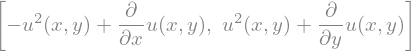

In [3]:
PDEs = [u.diff(x) - u**2, u.diff(y) + u**2]
PDEs

In [4]:
(PDEs[0].diff(y) - PDEs[1].diff(x)).subs({u.diff(x): u**2, u.diff(y): -u**2})

In [5]:
PDEs[0].subs({u: 1/(-x + y + C)}).doit()

In [6]:
PDEs[1].subs({u: 1/(-x + y + C)}).doit()

h = 0.2


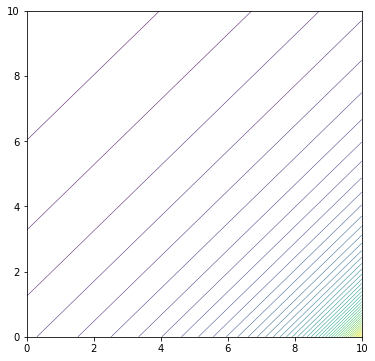

In [7]:
def ex(x, y, C):
    return 1./(-x + y + C)

N, C = 51, 12.
x, y = meshgrid(linspace(0., 10., num=N, dtype=float64),\
                linspace(0., 10., num=N, dtype=float64), indexing='ij')
h = x[1][0] - x[0][0]
print("h =", h)

levels1 = arange(ex(x[0, -1], y[0, -1], C), ex(x[-1, 0], y[-1, 0], C), 0.01)
fig = figure(figsize=(6, 6))
contour(x, y, ex(x, y, C), levels1, linewidths=0.5)
show()
# savefig('./fig-in7a.pdf')
close()

In [8]:
def u(j, k):
    j = 'j' if j == 0 else 'j+%d' % j
    k = 'k' if k == 0 else 'k+%d' % k
    return symbols(r'u_{%s\,%s}' % (j, k))
def T(a, j, k):
    if a.args:
        return a.func(*(T(s, j, k) for s in a.args))
    else:
        s = str(a)
        if len(s) < 4 or s[:4] != 'u_{j':
            return a
        else:
            p = s.find(',k', 4)
            j1 = 0 if not s[4:p] else int(s[4:p]) 
            k1 = 0 if not s[p+2:-1] else int(s[p+2:-1])
            return u(j1 + j, k1 + k)

In [9]:
def err(solXY):
    return abs(solXY - ex(x, y, C))/(1. + abs(ex(x, y, C)))

# difference scheme (55) #
\begin{equation}
\left\{
\begin{gathered}
\dfrac{u_{j+1\,k}-u_{j\,k}}{h_1} - u_{j\,k}^2 = 0 , \\
\dfrac{u_{j\,k+1}-u_{j\,k}}{h_2} + u_{j\,k}^2 = 0 .
\end{gathered}
\right.
\end{equation}

In [10]:
eq1 = expand(u(1, 0) - u(0, 0) - h1*u(0, 0)**2)
eq1

In [11]:
eq2 = expand(u(0, 1) - u(0, 0) + h2*u(0, 0)**2)
eq2

In [12]:
spoly = expand(T(eq1, 0, 1) - T(eq2, 1, 0))
spoly

In [13]:
res = expand(spoly.subs({\
    u(1, 0): u(0, 0) + h1*u(0, 0)**2,\
    u(0, 1): u(0, 0) - h2*u(0, 0)**2,\
}))
res.factor()

In [14]:
solXY = empty_like(x)
solXY[0, 0] = ex(0., 0., C)
for j in range(1, N):
    solXY[j, 0] = solXY[j-1, 0] + h*solXY[j-1, 0]**2
for k in range(1, N):
    solXY[:, k] = solXY[:, k-1] - h*solXY[:, k-1]**2

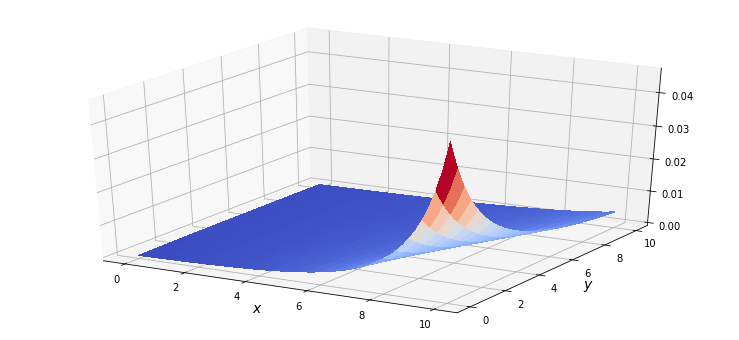

max error = 0.046222672401600905


In [15]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
ax.plot_surface(x, y, err(solXY), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig55.pdf')
close()
print("max error =", max(err(solXY).flat))

# difference scheme (56) #
\begin{equation}
\left\{
\begin{gathered}
\dfrac{u_{j+1\,k}-u_{j\,k}}{h_1} - u_{j\,k}^2 = 0 , \\
\dfrac{u_{j\,k+1}-u_{j\,k}}{h_2} + u_{j\,k+1}^2 = 0 .
\end{gathered}
\right.
\end{equation}

In [16]:
eq1 = expand(u(1, 0) - u(0, 0) - h1*u(0, 0)**2)
eq1

In [17]:
eq2 = expand(u(0, 1) - u(0, 0) + h2*u(0, 1)**2)
eq2

In [18]:
spoly = expand(h2*T(eq1, 0, 1)*u(1, 1) - T(eq2, 1, 0))
spoly

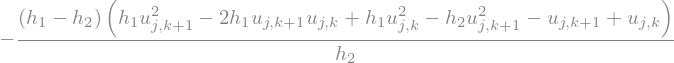

In [19]:
res = expand(spoly.subs({\
    u(1, 0): u(0, 0) + h1*u(0, 0)**2,\
    u(0, 1)**2: -(u(0, 1) - u(0, 0))/h2,\
    u(1, 1): u(0, 1) - h1*(u(0, 1) - u(0, 0))/h2,\
}))
res.factor()

In [20]:
res.subs({h2: h1}).factor()

\begin{equation}
\begin{aligned}
  v^2_{k+1} &= v^2_{k+1} - v^2_{k} + v^2_{k} = (v_{k+1} - v_{k})(v_{k+1} + v_{k}) + v^2_{k}
\approx v_{k+1}\cdot 2v_{k} - v_{k}^2 , \\
\end{aligned}
\end{equation}
\begin{equation}
u_k - u_{k-1} + u_k^2 h = 0 \quad \Rightarrow \quad u_k - u_{k-1} + u_k \cdot 2v_k h - v_i^2 h = 0
\quad \Rightarrow \quad u_k = \dfrac{u_{k-1} + v_k^2 h}{1 + 2v_k h}
\end{equation}

In [21]:
solXY = empty_like(x)
solXY[0, 0] = ex(0., 0., C)
for j in range(1, N):
    solXY[j, 0] = solXY[j-1, 0] + h*solXY[j-1, 0]**2
for k in range(1, N):
    solXY[:, k], f = solXY[:, k-1], True
    while f:
        v = (solXY[:, k-1] + solXY[:, k]**2*h)/(1. + 2*solXY[:, k]*h)
        f = norm(solXY[:, k] - v) >= 1.e-12
        solXY[:, k] = v

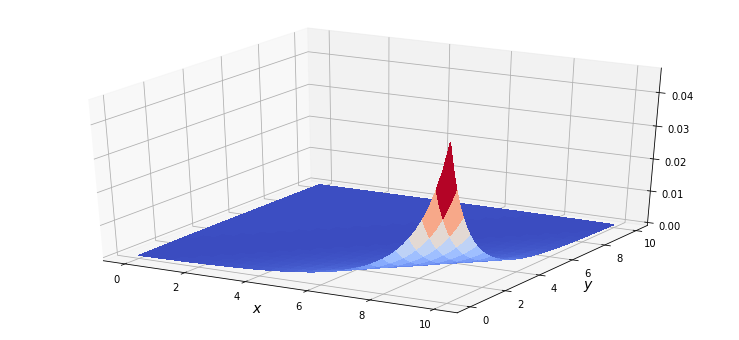

max error = 0.046222672401600905


In [22]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
ax.plot_surface(x, y, err(solXY), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig56.pdf')
close()
print("max error =", max(err(solXY).flat))

# difference scheme (56) correct PDA #
\begin{equation}
\left\{
\begin{gathered}
\dfrac{u_{j+1\,k}-u_{j\,k}}{h} - u_{j\,k}^2 - u_{j\,k}^3 h^2= 0 , \\
\dfrac{u_{j\,k+1}-u_{j\,k}}{h} + u_{j\,k+1}^2 + u_{j\,k}^3 h^2 = 0 .
\end{gathered}
\right.
\end{equation}

\begin{equation}
\begin{aligned}
  v^2_{k+1} &= v^2_{k+1} - v^2_{k} + v^2_{k} = (v_{k+1} - v_{k})(v_{k+1} + v_{k}) + v^2_{k}
\approx v_{k+1}\cdot 2v_{k} - v_{k}^2 , \\
v^3_{k+1} &= v^3_{k+1} - v^3_{k} + v^3_{k} = (v_{k+1} - v_{k})(v_{k+1}^2 +v_{k+1}v_{k} + v_{k}^2) + v^3_{k}
\approx v_{k+1}\cdot 3v_{k}^2 - 2v_{k}^3
\end{aligned}
\end{equation}

\begin{equation}
\begin{aligned}
u_k - u_{k-1} + u_k^2 h + u_k^3 h^2 = 0 \quad & \Rightarrow \quad 
u_k - u_{k-1} + u_k \cdot 2v_k h - v_k^2 h + u_k \cdot 3v_k^2 h^2 - 2v_k^3 h^2 
= 0 \\
& \Rightarrow \quad u_k = \dfrac{u_{k-1} + v_k^2 h + 2v_k^3 h^2}{1 + 2v_k h + 3v_k^2 h^2}
\end{aligned}
\end{equation}

In [23]:
# correct PDA
solXY = empty_like(x)
solXY[0, 0] = ex(0., 0., C)
for j in range(1, N):
    solXY[j, 0] = solXY[j-1, 0] + h*solXY[j-1, 0]**2 + solXY[j-1, 0]**3*h**3
for k in range(1, N):
    solXY[:, k], f = solXY[:, k-1], True
    while f:
        v = (solXY[:, k-1] + solXY[:, k]**2*h + 2*solXY[:, k]**3*h**2)\
        /(1. + 2*solXY[:, k]*h + 3*solXY[:, k]**2*h**2)
        f = norm(solXY[:, k] - v) >= 1.e-12
        solXY[:, k] = v

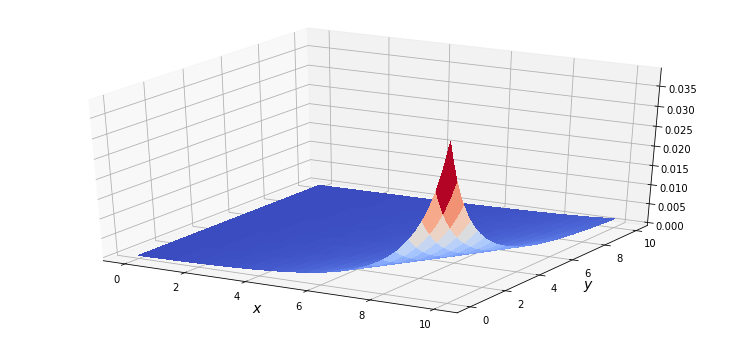

max error = 0.038621319610305495


In [24]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
ax.plot_surface(x, y, err(solXY), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig56PDA.pdf')
close()
print("max error =", max(err(solXY).flat))

# difference scheme (57) #
\begin{equation}
\left\{
\begin{gathered}
\dfrac{u_{j+2\,k}-u_{j\,k}}{2h_1} - u_{j+1\,k}^2 = 0 , \\
\dfrac{u_{j\,k+2}-u_{j\,k}}{2h_2} + u_{j\,k+1}^2 = 0 .
\end{gathered}
\right.
\end{equation}

In [25]:
eq1 = u(2, 0) - u(0, 0) - 2*h1*u(1, 0)**2
eq1

In [26]:
eq2 = u(0, 2) - u(0, 0) + 2*h2*u(0, 1)**2
eq2

In [27]:
spoly = expand(T(eq1, 0, 2) - T(eq2, 2, 0))
spoly

In [28]:
res = expand(spoly.subs({\
    u(2, 0): u(0, 0) + 2*h1*u(1, 0)**2,\
    u(0, 2): u(0, 0) - 2*h2*u(0, 1)**2,\
    u(2, 1): u(0, 1) + 2*h1*u(1, 1)**2,\
    u(1, 2): u(1, 0) - 2*h2*u(1, 1)**2,\
}))
res.factor()

In [29]:
res.subs({h2: h1}).factor()

In [30]:
solXY = empty_like(x)
solXY[:2, :] = ex(x[:2, :], y[:2, :], C)
for j in range(2, N):
    solXY[j, :] = solXY[j-2, :] + 2*h*solXY[j-1, :]**2

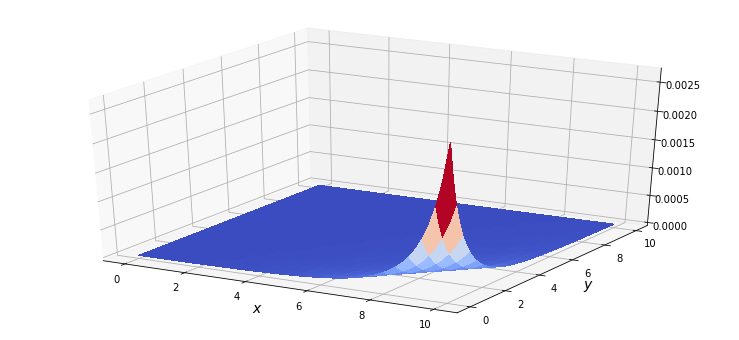

max error = 0.0026833687620488877


In [31]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
ax.plot_surface(x, y, err(solXY), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig57.pdf')
close()
print("max error =", max(err(solXY).flat))

# difference scheme (57) correct PDA#
\begin{equation}
\left\{
\begin{gathered}
\dfrac{u_{j+2\,k}-u_{j\,k}}{2h} - u_{j+1\,k}^2 - u_{j+1\,k}^4 h^2 = 0 , \\
\dfrac{u_{j\,k+2}-u_{j\,k}}{2h} + u_{j\,k+1}^2 + u_{j\,k+1}^4 h^2 = 0 .
\end{gathered}
\right.
\end{equation}

In [32]:
#  correct PDA
solXY = empty_like(x)
solXY[:2, :] = ex(x[:2, :], y[:2, :], C)
for j in range(2, N):
    solXY[j, :] = solXY[j-2, :] + 2*h*solXY[j-1, :]**2 + 2*h**3*solXY[j-1, :]**4

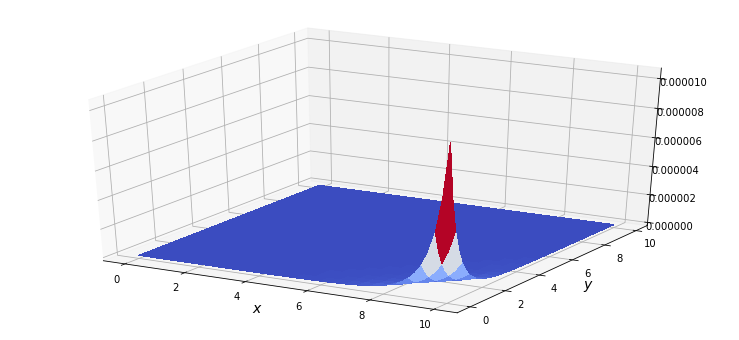

max error = 1.0482200407964845e-05


In [33]:
fig = figure(figsize=(13, 6))
ax = fig.gca(projection='3d')
ax.set_xlabel(r'$x$', {'fontsize': 14})
ax.set_ylabel(r'$y$', {'fontsize': 14})
ax.plot_surface(x, y, err(solXY), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
show()
# savefig('./fig57PDA.pdf')
close()
print("max error =", max(err(solXY).flat))